<a href="https://colab.research.google.com/github/finfrierson/data-science-fundamentals/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

A polynomial allows you to more accurately match the trends in your data, like in a nonlinear situaion. These models allow you to customize how fitted you want them to be by using a different highest degree. This allows you to find a good fit without overfitting.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

They aren't the best model you could do, and if you aren't careful it will overfit your data which can cause problems. Additionally, a more complex model could end up hard to understand.

**Task3**:

What's the point of using b splines?

It can capture a good fit, but does not overfit as poorly as most polynomials.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

Essentially, a gaussian proccess is a neural network which creatws a knot at each of the data points. It creates its predictions based on relaationships in the data, not just the point it is at and around, thus ccreating a very accurate model.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [2]:
!pip install preliz


import preliz as pz
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

  Using cached preliz-0.15.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached preliz-0.15.0-py3-none-any.whl (517 kB)
Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)


In [6]:
!pip install bambi
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 5.2 MB/s eta 0:00:00


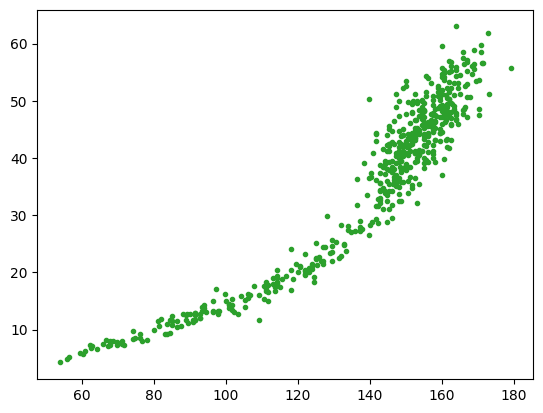

In [4]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')
height=howell["height"]
weight=howell["weight"]
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

In [9]:
num_knots = 6
knots = np.linspace(55, 78, num_knots+2)[1:-1]
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


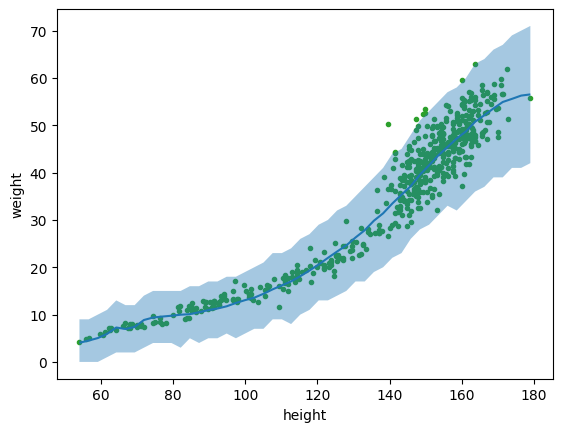

In [10]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

As there is less data for a GP model to draw from, it will become increasingly erratic with its predictions (From looking at graphs in conclusions section).

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite grah from the article was the second "samples from the GP posterior" graph, because A. it helps me understand that as there is less data, GPs become very erratic, but B. stay relativeley consistant around expected mean, and c. Silly spiky graph :)